In [3]:
%pylab inline
import sympy as sp
sp.init_printing()

Populating the interactive namespace from numpy and matplotlib


# Symbolic variables

In [321]:

dt        = sp.Symbol('dt')
psi_k1_k1 = sp.Symbol('\psi_{k-1 | k-1}') # roll prior
psi_k_k1  = sp.Symbol('\psi_{k   | k-1}') # roll predicted
psi_k_k   = sp.Symbol('\psi_{k   | k  }') # roll post
d_psi     = sp.Symbol('\dot{\psi}_{k-1}') # roll rate
psi_m     = sp.Symbol('\psi_m')           # mesured roll


### State

In [387]:

x_k1_k1 = sp.Matrix([ psi_k1_k1 ]) # prior
x_k_k1  = sp.Matrix([ psi_k_k1  ]) # predicted
x_k_k   = sp.Matrix([ psi_k_k   ]) # post

x_k_k

### Measurement noise

In [388]:
sigma = sp.Symbol('\sigma_{m}')

# Measurement noise covariance
R = sigma * sp.eye(1)

R

### Measurement

In [389]:
z_k = sp.Matrix([ psi_m ])

z_k

### Input

In [390]:
u_k1    = sp.Matrix([ d_psi ])

u_k1

### State covariance matrix

In [392]:
P_k1_k1 = sp.Matrix([ sp.Symbol('p_{k-1 | k-1}') ])
P_k_k1  = sp.Matrix([ sp.Symbol('p_{k   | k-1}') ])
P_k_k   = sp.Matrix([ sp.Symbol('p_{k   | k}') ])

P_k_k

### Process noise covariance

In [393]:
Q = sp.Matrix([ sp.Symbol('q') ])

Q

---

---

# Kalman formulas

### State Prediction

In [394]:
def f(x, u, dt):
    return x + dt*u

x_k_k1 = f( x_k1_k1, u_k1, dt )

x_k_k1

### Jacobian of State Prediction

In [323]:
F = f( x_k1_k1, u_k1, dt ).jacobian( x_k1_k1 )

F

### State Covariance prediction

In [324]:
P_k_k1 = F * P_k1_k1 * F.T + Q

P_k_k1

### Observation fonction

In [338]:
def h(x):
    return x

h(x_k_k1)

### Jacobian of observation function

In [339]:
H = h(x_k_k1).jacobian(x_k1_k1)

H

### Innovation

In [328]:
y = z_k - h(x_k_k1)

y

### Innovation covariance

In [329]:
S = H * P_k_k1 * H.T + R

S

### Kalman gain

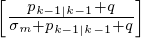

In [330]:
K = P_k_k1 * H.T * S**(-1)

K

### State Covariance update

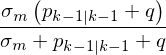

In [352]:
P_k_k = (sp.eye(1) - K * H) * P_k_k1

P_k_k[0].simplify()

### State update

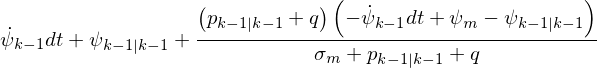

In [386]:
x_k_k = x_k_k1 + K * y

x_k_k[0]

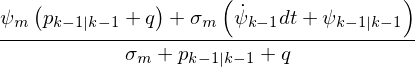

In [384]:
# by reordering the terms, we see that the 1D kalman is equivalent to the complementary filter
x_k_k[0].expand().factor([psi_m, sigma])